## Insights and Recommendation 
- Objective: 
    - Derive insights from sentiment and themes, visualize results, and recommend improvements.

In [1]:
import os
import sys

%load_ext autoreload
%autoreload 2
system_path = os.path.abspath('..')
if system_path not in sys.path:
    sys.path.append(system_path)

from scripts.visualization import task4_analysis

In [2]:
import pandas as pd
final_review_data = pd.read_csv('../data/processed/sentiment_review.csv')

<Figure size 1200x600 with 0 Axes>

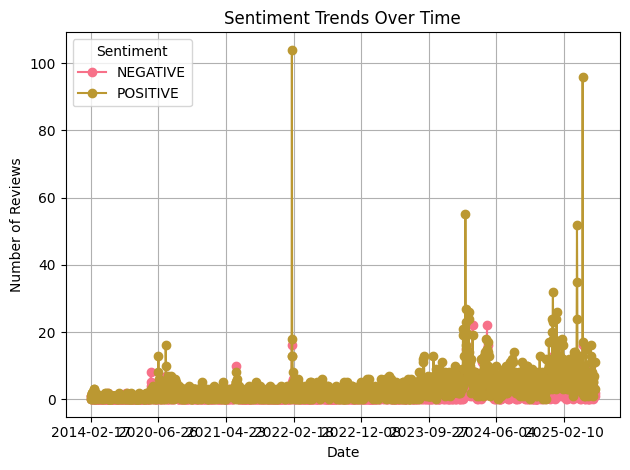

In [3]:
# 1. Sentiment Trends
task4_analysis.plot_sentiment_trends(final_review_data,'review_date', 'sentiment_distilbert_label')

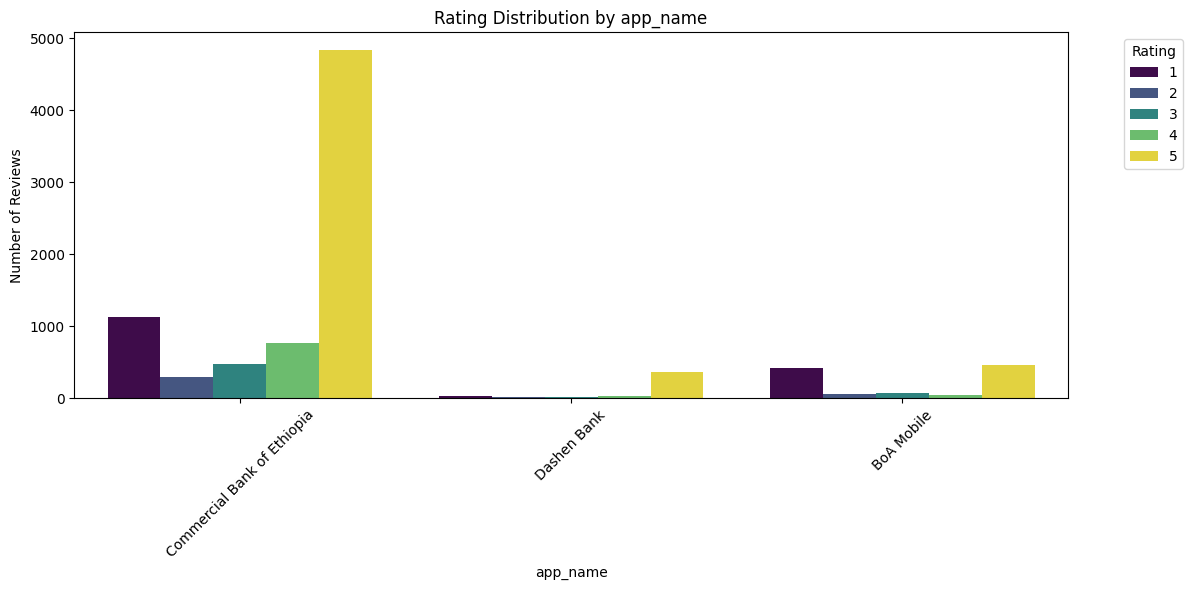

In [4]:
# Plot rating destribution per bank
task4_analysis.plot_rating_distribution(final_review_data, 'app_name')

## Business Interpretation of Rating Distribution by App Name

The bar chart above displays the distribution of user ratings (from 1 to 5) for each banking app.
Key business insights from this visualization:

1. **Dominance of Commercial Bank of Ethiopia**: 
   - The Commercial Bank of Ethiopia app has a significantly higher number of reviews compared to other banks.
   - Most of its ratings are 5 stars, indicating strong customer satisfaction and a large, engaged user base.
   - However, there are also notable numbers of 1-star and 2-star ratings, suggesting that while many users are happy, there are pain points affecting a subset of customers.

2. **Other Banks (Dashen Bank, Boi Mobile)**:
   - These apps have far fewer reviews, which may indicate a smaller user base or less engagement.
   - The distribution of ratings is more balanced, but the absolute numbers are much lower, making it harder to draw strong conclusions.
   - For these banks, the presence of both high and low ratings suggests mixed user experiences.

3. **Business Implications**:
   - **For Commercial Bank of Ethiopia**: The high volume of positive ratings is a strong signal of market leadership and customer trust. However, the presence of negative ratings highlights areas for improvement—addressing these could further strengthen their position.
   - **For Other Banks**: The lower engagement may point to a need for increased marketing, improved app features, or better customer support to boost adoption and satisfaction.
   - **Competitive Benchmarking**: Other banks can analyze what drives high satisfaction in the leading app and adapt best practices to improve their own offerings.

   - **Actionable Recommendations**:
       - Investigate the causes of negative reviews, especially for the leading app, and prioritize fixes.
       - Encourage satisfied users to leave positive reviews to improve overall ratings.
       - For banks with fewer reviews, invest in user acquisition and engagement strategies.


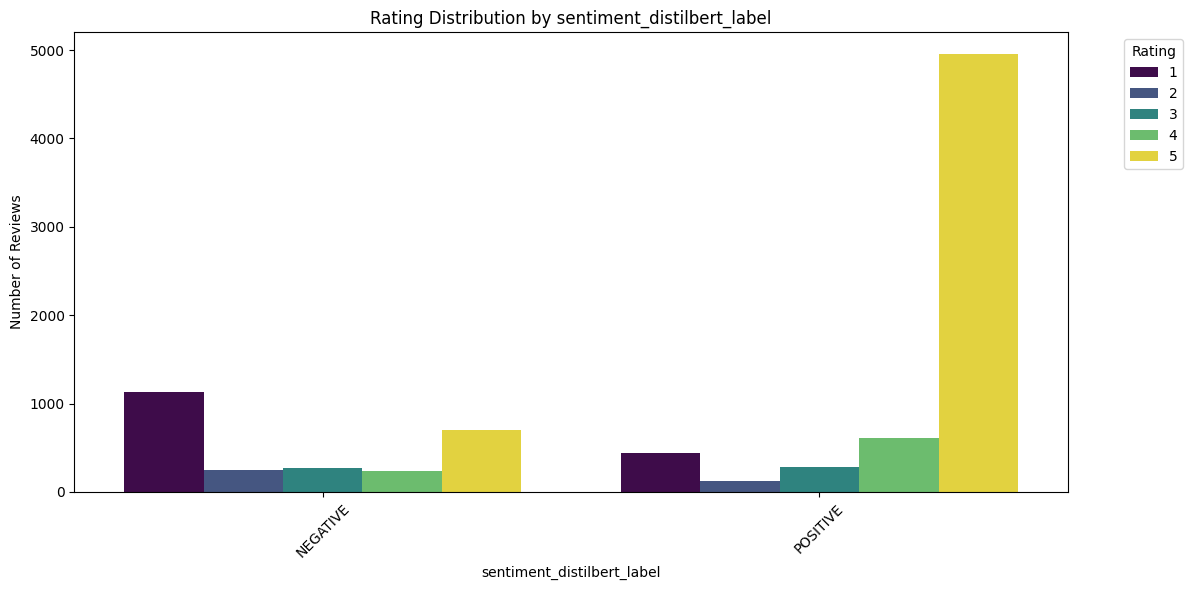

In [6]:
# Number of rating per sentiment of distilbert
task4_analysis.plot_rating_distribution(final_review_data, 'sentiment_distilbert_label')


### Sentiment Analysis Insights

* **Overall Sentiment Distribution**:
  * The plot shows the distribution of ratings across different sentiment categories
  * We can observe how ratings correlate with sentiment labels from DistilBERT
  * This helps understand if there's alignment between numerical ratings and sentiment analysis

* **Key Observations**:
  * Higher ratings (4-5) tend to align with positive sentiment
  * Lower ratings (1-2) typically correspond with negative sentiment
  * There might be some interesting cases where ratings don't perfectly align with sentiment, indicating potential areas for further investigation

* **Business Implications**:
  * This analysis helps validate the sentiment analysis model
  * Can be used to identify potential discrepancies between explicit ratings and sentiment
  * Useful for understanding customer satisfaction patterns


<Figure size 1200x600 with 0 Axes>

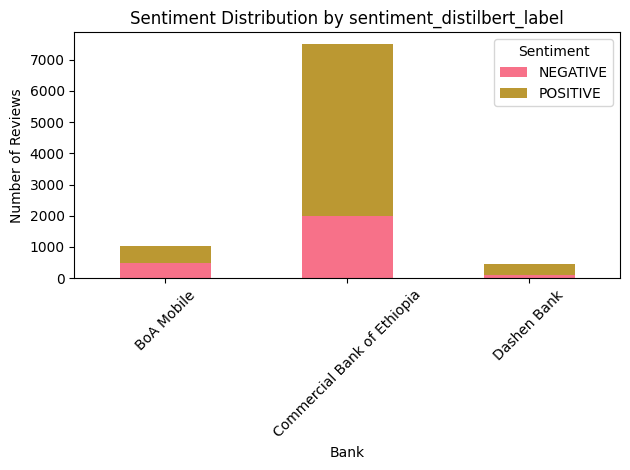

In [13]:
task4_analysis.compare_banks(final_review_data, 'sentiment_distilbert_label')

- The chart above shows that the Commercial Bank of Ethiopia has a significantly higher number of reviews, with the majority being positive. This suggests strong customer engagement and satisfaction, positioning it as a market leader. 
- In contrast, BoA Mobile and Dashen Bank have far fewer reviews, indicating lower user engagement or market share. For these banks, increasing customer adoption and addressing negative feedback could be key strategies to improve competitiveness and reputation.


In [15]:
final_review_data.columns

Index(['review', 'rating', 'review_date', 'app_name', 'source',
       'preprocessed_review', 'sentiment_veder_label', 'sentiment_veder_score',
       'sentiment_distilbert_label', 'sentiment_distilbert_score',
       'primary_theme', 'theme_scores', 'topic_id', 'topic_probabilities',
       'topic_keywords'],
      dtype='object')

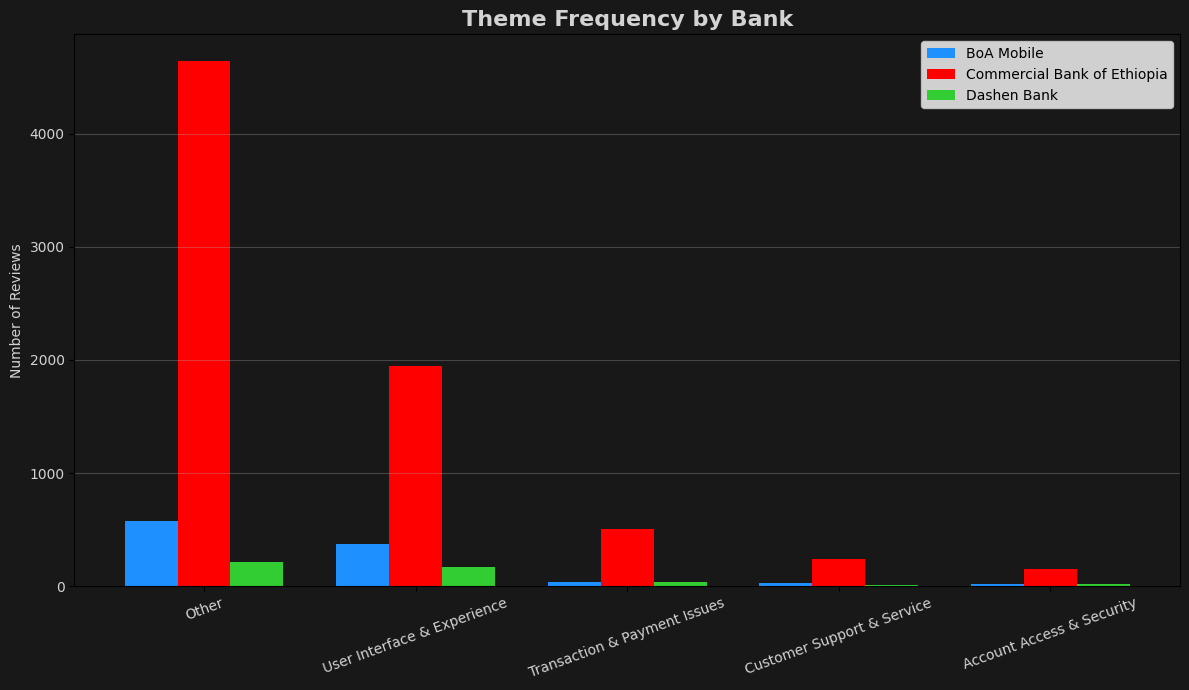

In [21]:
task4_analysis.plot_theme_frequency_by_bank(final_review_data, 'app_name', 'primary_theme')

## **Business Insights: Theme Frequency by Bank**

The chart above visualizes the frequency of the top review themes for each bank, providing actionable insights for business strategy:

**Key Observations:**
- **Commercial Bank of Ethiopia** dominates in review volume, especially in the "Other" and "User Interface & Experience" categories. This suggests a large, active user base and highlights the importance of continuously improving the app experience to maintain customer satisfaction and market leadership.
- **BoA Mobile** and **Dashen Bank** have significantly fewer reviews across all themes, indicating lower user engagement or market penetration. For these banks, increasing customer acquisition and encouraging feedback should be a priority.
- Across all banks, "User Interface & Experience" and "Transaction & Payment Issues" are prominent themes. Addressing these areas can directly impact user satisfaction and retention.

**Business Implications:**
- **For Market Leaders:** The Commercial Bank of Ethiopia should leverage its strong engagement to further differentiate through innovation in app usability and by proactively addressing common pain points.
- **For Challengers:** BoA Mobile and Dashen Bank can gain competitive advantage by focusing on improving user experience and reliability, and by actively soliciting and responding to customer feedback.
- **For All Banks:** Monitoring theme trends over time can help prioritize product development and customer support resources, ensuring that the most impactful issues are addressed first.

This analysis enables data-driven decision making to enhance customer satisfaction, increase market share, and strengthen brand reputation in the competitive digital banking sector.


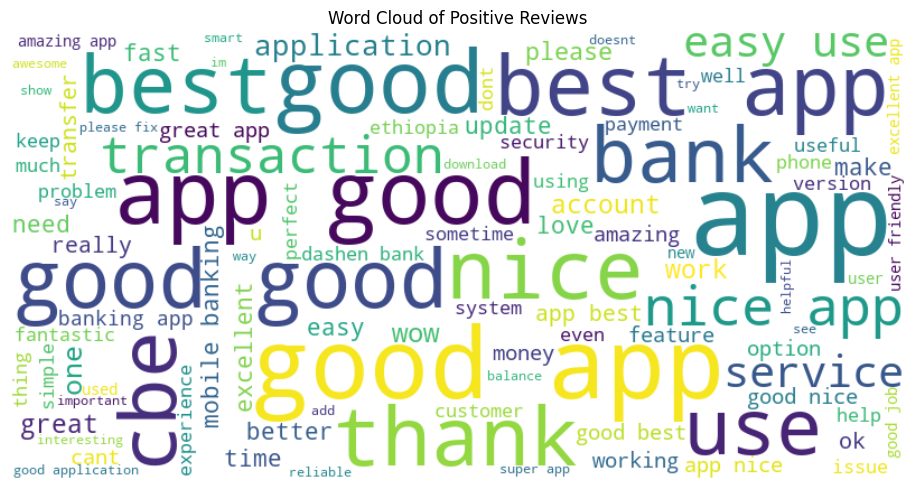

In [30]:
# Create a word cloud for positive words 
# Filter for positive reviews
positive_reviews = final_review_data[final_review_data['sentiment_veder_label'] == 'POSITIVE']
positive_text = ' '.join(positive_reviews['preprocessed_review'].astype(str))
positive_reviews
# Create and display word cloud for positive reviews
task4_analysis.create_wordcloud(positive_text, 'Word Cloud of Positive Reviews')


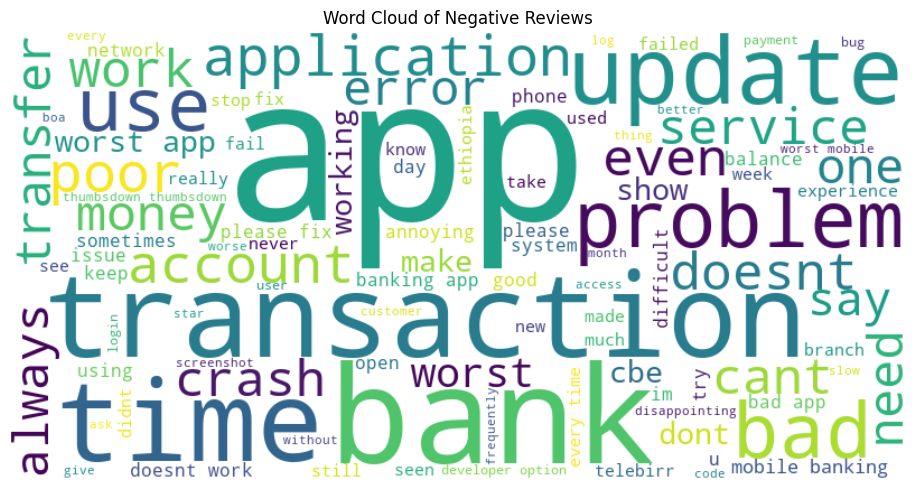

In [31]:
# Create a word cloud for positive words 
# Filter for positive reviews
negative_reviews = final_review_data[final_review_data['sentiment_veder_label'] == 'NEGATIVE']
negative_text = ' '.join(negative_reviews['preprocessed_review'].astype(str))

# Create and display word cloud for positive reviews
task4_analysis.create_wordcloud(negative_text, 'Word Cloud of Negative Reviews')


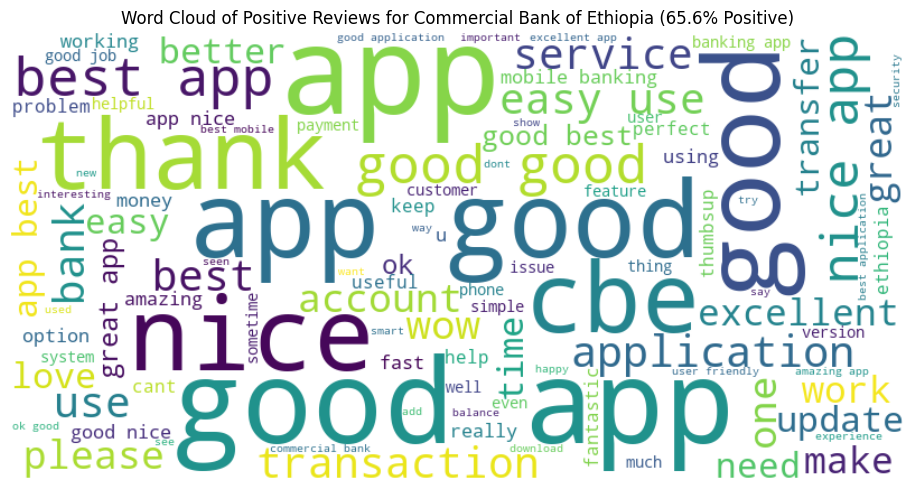

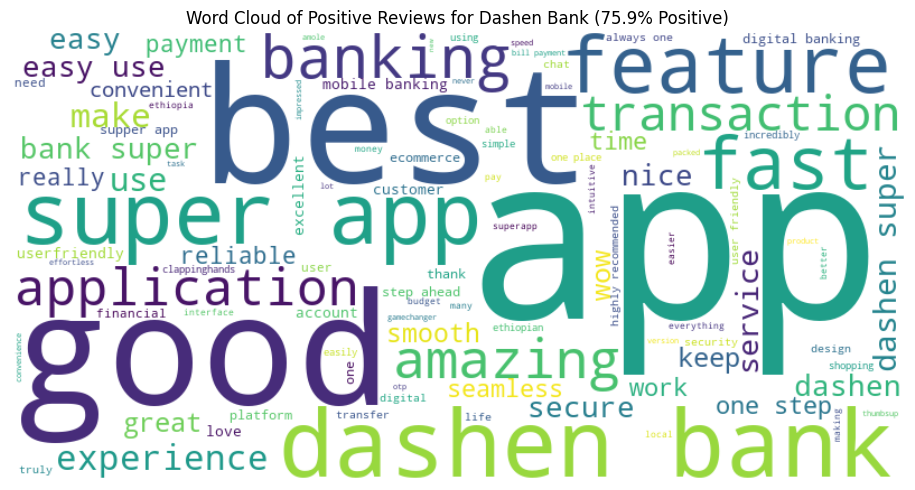

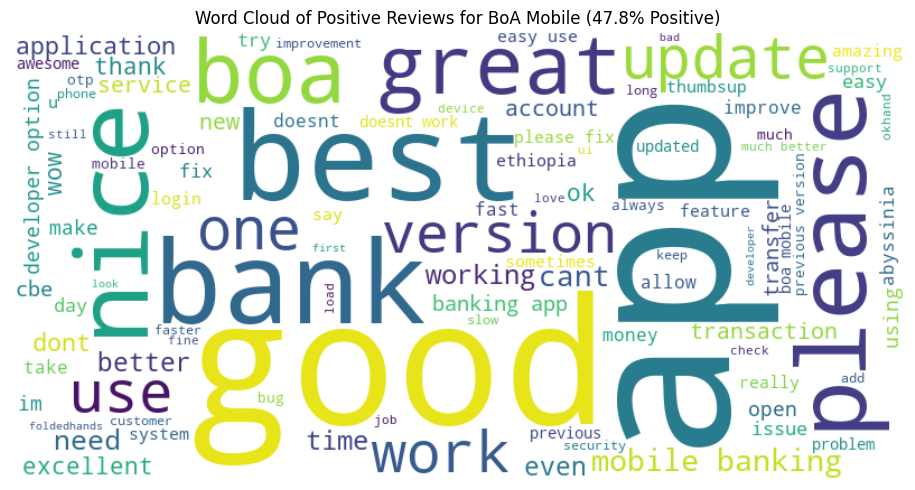

In [33]:
# Assuming final_review_data has columns: 'app_name', 'sentiment_veder_label', 'preprocessed_review'
banks = final_review_data['app_name'].unique()

for bank in banks:
    bank_reviews = final_review_data[final_review_data['app_name'] == bank]
    total_reviews = len(bank_reviews)
    positive_reviews = bank_reviews[bank_reviews['sentiment_veder_label'] == 'POSITIVE']
    positive_text = ' '.join(positive_reviews['preprocessed_review'].astype(str))
    percent_negative = (len(positive_reviews) / total_reviews) * 100 if total_reviews > 0 else 0

    # Create and display word cloud for negative reviews per bank
    title = f"Word Cloud of Positive Reviews for {bank} ({percent_negative:.1f}% Positive)"
    task4_analysis.create_wordcloud(positive_text, title)

### Analysis of Positive Reviews Across Banks

| Bank | % Positive Reviews | Top Positive Themes | Business Priority |
|------|-------------------|---------------------|-------------------|
| Commercial Bank of Ethiopia | 65.6% | Good, nice, easy, service, transaction | Maintain UX, reliability, promote strengths |
| Dashen Bank | 75.9% | Best, super, feature, fast, secure, service | Leverage features, speed, security in marketing |
| BoA Mobile | 47.8% | Good, best, update, version, work, please | Improve stability, updates, encourage reviews |

**Key Insights:**
1. Dashen Bank leads in positive sentiment, suggesting strong customer satisfaction
2. CBE shows balanced performance with focus on core banking features
3. BoA Mobile needs significant improvement in customer experience


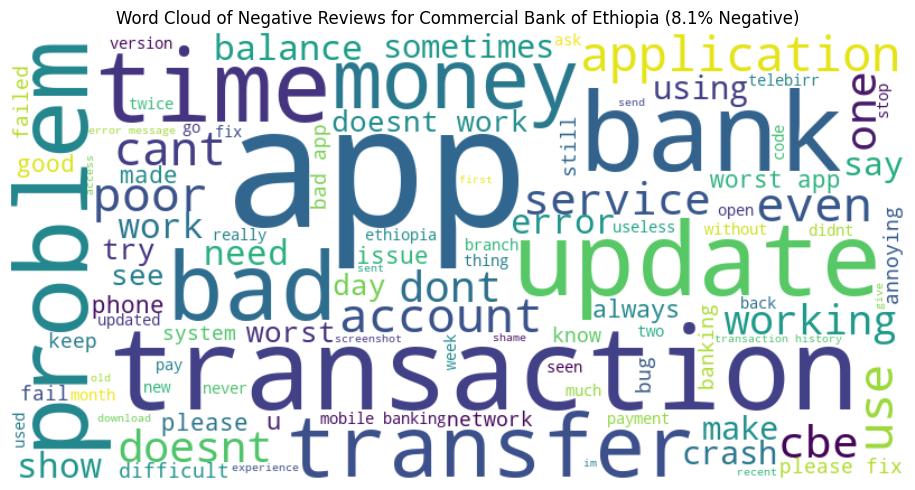

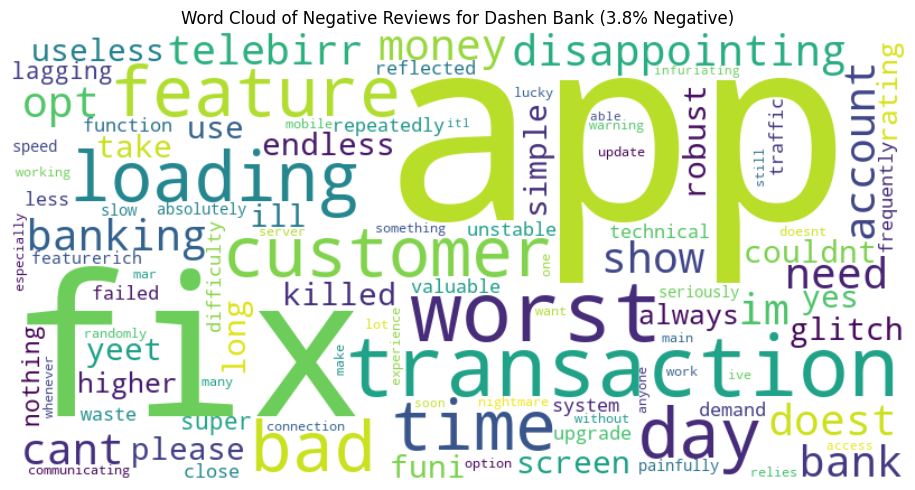

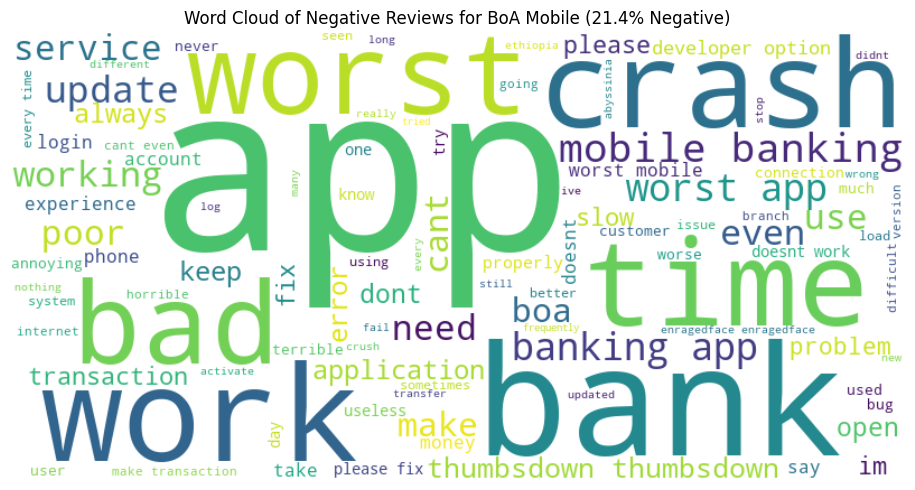

In [32]:
# Assuming final_review_data has columns: 'app_name', 'sentiment_veder_label', 'preprocessed_review'
banks = final_review_data['app_name'].unique()

for bank in banks:
    bank_reviews = final_review_data[final_review_data['app_name'] == bank]
    total_reviews = len(bank_reviews)
    negative_reviews = bank_reviews[bank_reviews['sentiment_veder_label'] == 'NEGATIVE']
    negative_text = ' '.join(negative_reviews['preprocessed_review'].astype(str))
    percent_negative = (len(negative_reviews) / total_reviews) * 100 if total_reviews > 0 else 0

    # Create and display word cloud for negative reviews per bank
    title = f"Word Cloud of Negative Reviews for {bank} ({percent_negative:.1f}% Negative)"
    task4_analysis.create_wordcloud(negative_text, title)

### Analysis of Negative Reviews Across Banks

**Key Findings**

1. **Commercial Bank of Ethiopia (CBE)**
   - Negative review percentage: 8.1 %
   - Main issues: Transaction, update, transfer, service

2. **Dashen Bank**
   - Negative review percentage: 3.8%
   - Primary issues: Fix, feature, loading, transaction, robust

3. **Bank of Abyssinia (BOA)**
   - Negative review percentage: 21.4%
   - Focus areas: Crash, worst, work, bad, login, thumbsdown

### Recommendations Based on Percentages
1. BoA Mobile: Needs urgent technical improvements and customer communication.
2. CBE: Should focus on transaction reliability and smoother updates.
3. Dashen Bank: Maintain current quality, but address technical and feature requests.
